# NGC 309: Perform SED fitting to the SEDs of the spatial bins

In [3]:
import numpy as np
import math
import sys
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME+'/src')

import piXedfit_model

### Call function piXedfit_fit for performing SED fitting to the SEDs of spatial bins

In [ ]:
from piXedfit_fitting import piXedfit_fit

## Run the SED fitting
It is recommended to run the SED fitting on a cluster that has multiple cores

In [ ]:
## input spectrophotometric SEDs data containing SEDs of spatial bins
fits_binmap = "pixbin_match_specphoto_crop_fluxmap_califa_NGC309.fits.gz"
## specify range of bin index that will be fit. 'None' means the fitting will be performed for all bins
binidx_range = None
## set of filters:
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z',
            '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']

imf_type = 1            ## Chabrier (2003) IMF
sfh_form = 4            ## Double power law SFH
dust_ext_law = 1          ## Calzetti et al. (2000)
duste_switch = 0          ## turn off dust emission modeling
nebulare_switch = 1       ## turn on nebular emission modeling
add_agn = 0               ## turn off modeling of AGN dusty torus emission
fit_method = 'mcmc'       ## use MCMC method
nwalkers = 100            ## Number of walkers
nsteps = 1000             ## Number of steps per walker
nproc = 20                ## Number of processors to be used
## set prior ranges: flat priors in all parameters
logzsol_range = [-2.0,0.2]
log_tau_range = [-1.0,1.14]
log_age_range = [-1.0,1.14]
dust2_range = [0.0,3.0]
log_alpha_range = [-2.0,1.5]
log_beta_range = [-2.0,1.5]

piXedfit_fit(fits_binmap=fits_binmap,binidx_range=binidx_range,filters=filters,imf_type=imf_type,
             sfh_form=sfh_form,dust_ext_law=dust_ext_law,duste_switch=duste_switch,nebulare_switch=nebulare_switch,
             add_agn=add_agn,gas_logu=-2.0,fit_method='mcmc',logzsol_range=logzsol_range,
             log_tau_range=log_tau_range,log_age_range=log_age_range,dust2_range=dust2_range,
             log_alpha_range=log_alpha_range,log_beta_range=log_beta_range,nwalkers=nwalkers,nsteps=nsteps,
             nproc=nproc,name_chains_fits=None)

## Check the fitting results of some spatial bins

In [5]:
### import some functions from piXedfit_analysis
from piXedfit_analysis import plot_corner
from piXedfit_analysis import plot_SED
from piXedfit_analysis import plot_sfh

## (1) Bin id = 5

### Make corner plot

### Plotting posteriors probability distributions..
==> Number of parameters: 8


'corner_chains_califa_NGC309_bin_5.png'

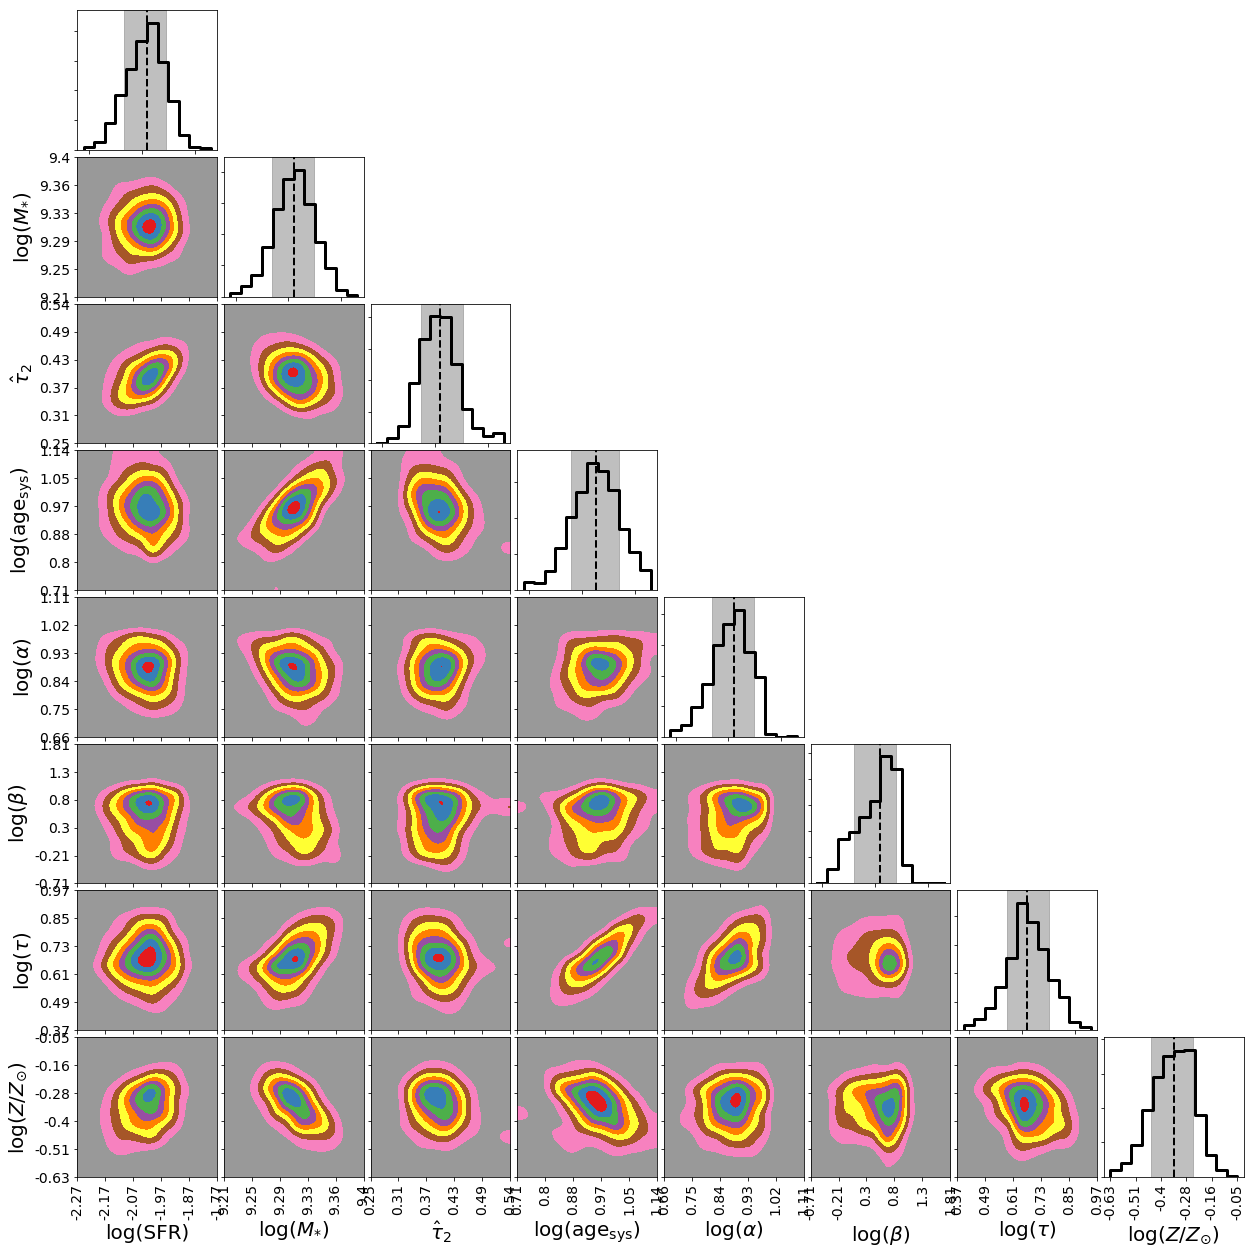

In [7]:
%matplotlib inline

bin_id = 5

plot_params = ['log_sfr','log_mass','dust2','log_age','log_alpha','log_beta','log_tau','logzsol']

label_params={'log_sfr':'log(SFR)','log_mass':'log($M_{*}$)','dust2':'$\hat \\tau_{2}$', 
              'log_age':'log($\mathrm{age}_{\mathrm{sys}}$)',
              'log_alpha':'log($\\alpha$)', 'log_beta':'log($\\beta$)',
              'log_tau':'log($\\tau$)','logzsol':'log($Z/Z_{\odot}$)'}

name_chains_fits = "chains_califa_NGC309_bin_%d.fits" % bin_id
plot_corner(name_sampler_fits=name_chains_fits, params=plot_params, label_params=label_params)

### Make SED plot

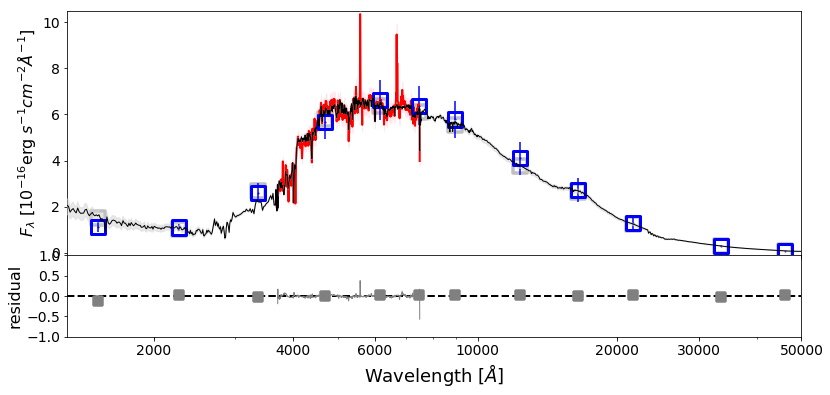

In [59]:
bin_id = 5
name_chains_fits = "chains_califa_NGC309_bin_%d.fits" % bin_id

nchains = 100
fit_method = 'mcmc'
funit = 'erg/s/cm2/A'
logscale_x=True
logscale_y=False
xrange = None
yrange = None
wunit = 0
shadow_plot = 1
decompose = 0
xticks = [2000,4000,6000,10000,30000,50000]
obs_spec_wave=[]
obs_spec_flux=[]
obs_spec_flux_err=[]

if np.sum(bin_spec_SED[int(bin_id)-1])>0:
    specphoto = 1
else:
    specphoto = 0
    
name_plot = "test_sed_plot.png"
name_plot,wave,p16_spec_tot,p50_spec_tot,p84_spec_tot,p50_photo_flux = plot_SED(name_sampler_fits=name_chains_fits, 
                                                                 nchains=nchains, fit_method=fit_method,
                                                                 specphoto=specphoto,spec_sigma=5.0,
                                                                 poly_order=None,del_nebe_wave=10.0,
                                                                 obs_spec_wave=obs_spec_wave,
                                                                 add_neb_emission=None,obs_spec_flux=obs_spec_flux,
                                                                 obs_spec_flux_err=obs_spec_flux_err,
                                                                 logscale_x=logscale_x, logscale_y=logscale_y,
                                                                 xrange=xrange, yrange=yrange, wunit=wunit, 
                                                                 funit=funit, shadow_plot=shadow_plot,
                                                                 decompose=decompose, xticks=xticks,
                                                                 photo_color='blue', name_plot=None)


### Make SFH plot

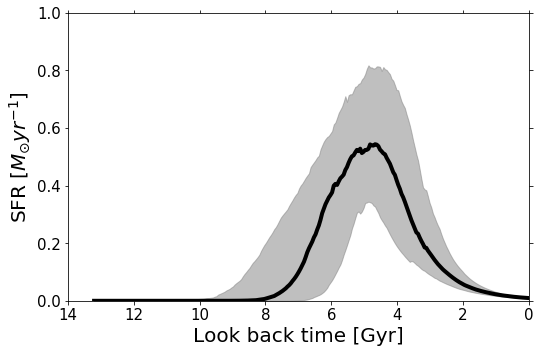

In [10]:
bin_id = 5
name_chains_fits = "chains_califa_NGC309_bin_%d.fits" % bin_id

plot_sfh(name_sampler_fits=name_chains_fits, fit_method='mcmc', nchains=300, plot_true=0,  
         lbacktime_max=14.0, yrange=[0.0,1.0], name_plot=None)

## (2) Bin id = 110

### Make corner plot

### Plotting posteriors probability distributions..
==> Number of parameters: 8


'corner_chains_califa_NGC309_bin_110.png'

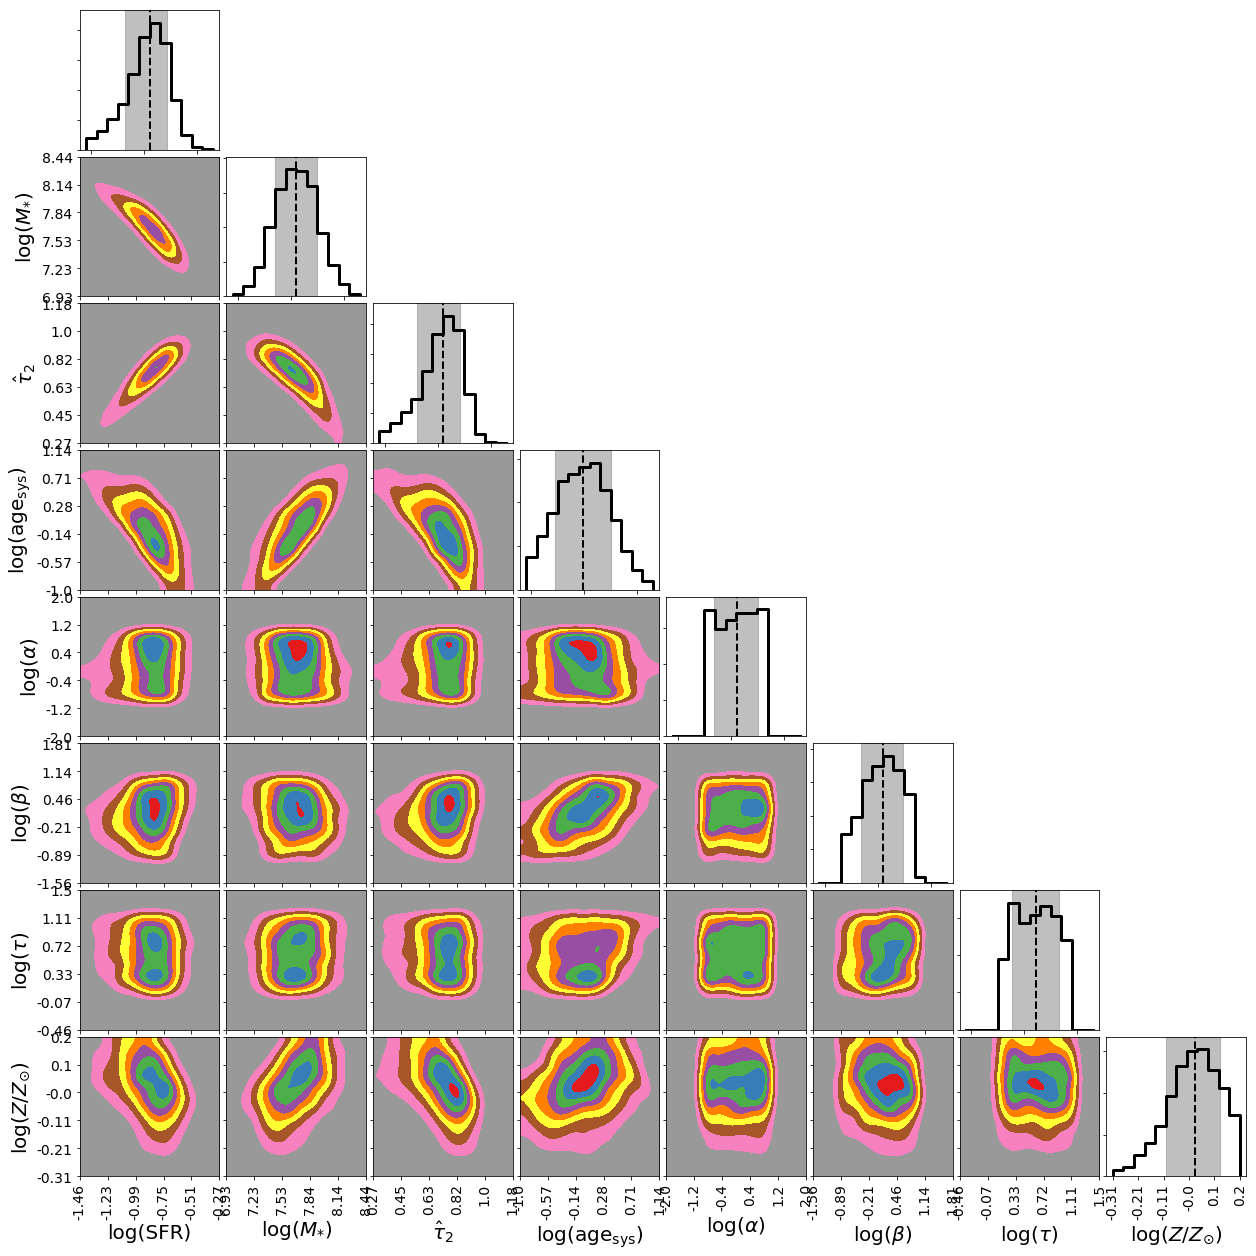

In [11]:
%matplotlib inline

bin_id = 110

plot_params = ['log_sfr','log_mass','dust2','log_age','log_alpha','log_beta','log_tau','logzsol']

label_params={'log_sfr':'log(SFR)','log_mass':'log($M_{*}$)','dust2':'$\hat \\tau_{2}$', 
              'log_age':'log($\mathrm{age}_{\mathrm{sys}}$)',
              'log_alpha':'log($\\alpha$)', 'log_beta':'log($\\beta$)',
              'log_tau':'log($\\tau$)','logzsol':'log($Z/Z_{\odot}$)'}

name_chains_fits = "chains_califa_NGC309_bin_%d.fits" % bin_id
plot_corner(name_sampler_fits=name_chains_fits, params=plot_params, label_params=label_params)

### Make SED plot

[5.450178e-16 3.261757e-16 2.207107e-16 2.137861e-16 1.689041e-16
 1.248393e-16 1.052497e-16 6.252410e-17 4.340601e-17 1.859086e-17
 5.151518e-18 1.859506e-18]
[5.71619814e-16 3.37334388e-16 2.09193710e-16 2.07131065e-16
 1.52425834e-16 1.05961569e-16 8.70955652e-17 4.92193621e-17
 3.07225763e-17 1.49820846e-17 3.77498175e-18 1.31794926e-18]


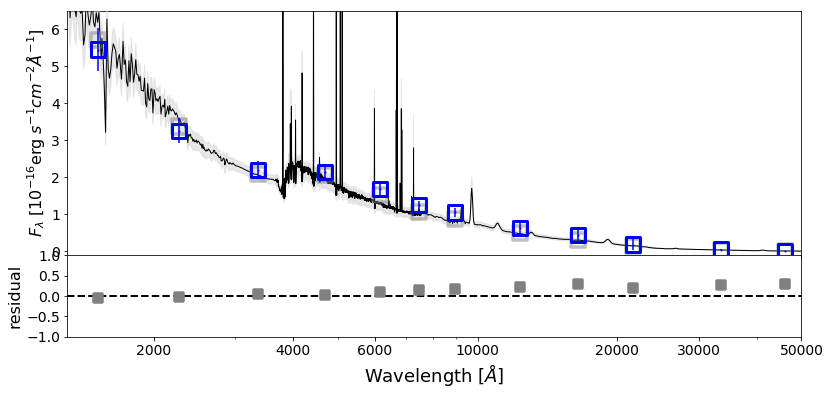

In [54]:
bin_id = 110
name_chains_fits = "chains_califa_NGC309_bin_%d.fits" % bin_id

nchains = 100
fit_method = 'mcmc'
funit = 'erg/s/cm2/A'
logscale_x=True
logscale_y=False
xrange = None
yrange = None
wunit = 0
shadow_plot = 1
decompose = 0
xticks = [2000,4000,6000,10000,30000,50000]
obs_spec_wave=[]
obs_spec_flux=[]
obs_spec_flux_err=[]

if np.sum(bin_spec_SED[int(bin_id)-1])>0:
    specphoto = 1
else:
    specphoto = 0
    
name_plot = "temp_plot.png"
name_plot,wave,p16_spec_tot,p50_spec_tot,p84_spec_tot,p50_photo_flux = plot_SED(name_sampler_fits=name_chains_fits, 
                                                                 nchains=nchains, fit_method=fit_method,
                                                                 specphoto=specphoto,spec_sigma=5.0,
                                                                 poly_order=None,del_nebe_wave=10.0,
                                                                 obs_spec_wave=obs_spec_wave,
                                                                 add_neb_emission=None,obs_spec_flux=obs_spec_flux,
                                                                 obs_spec_flux_err=obs_spec_flux_err,
                                                                 logscale_x=logscale_x, logscale_y=logscale_y,
                                                                 xrange=xrange, yrange=yrange, wunit=wunit, 
                                                                 funit=funit, shadow_plot=shadow_plot,
                                                                 decompose=decompose, xticks=xticks,
                                                                 photo_color='blue')


### Make SFH plot

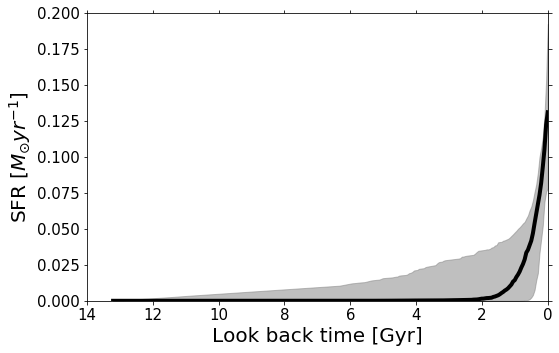

In [12]:
bin_id = 110
name_chains_fits = "chains_califa_NGC309_bin_%d.fits" % bin_id

plot_sfh(name_sampler_fits=name_chains_fits, fit_method='mcmc', nchains=300, plot_true=0,  
         lbacktime_max=14.0, yrange=[0.0,0.2], name_plot=None)